# autoencoder experiment on dlbcl data set
applying autoencoder to dlbcl data to denoise and reveal important features. autoencoder follows the pipeline:
- build autoencoder with a few convolution layers
- train autoencoder on windows of original/ control matrix
- use trained autoencoder to decode query/ patient matrix, removing noise and revealing important features

## imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import fanc
import fanc.plotting
from scipy import ndimage as ndi
import matplotlib.patches as patches
from scipy.ndimage import zoom
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
import math
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from skimage.metrics import structural_similarity as ssim

## import custom functions

In [2]:
import sys
sys.path.append(os.path.abspath(os.path.join('..', '..')))

from lib.chess_functions import clipped_zoom, highlight_features, clip_rotate
from lib.autoencoder import build_autoencoder, apply_autoencoder
from lib.stats import root_mean_squared_error, structural_similarity, explained_variance_score
from lib.load_data import load_hic_data

## load hic data

In [3]:
patient_region_sub, control_region_sub = load_hic_data()
print("loaded hic")

loaded hic


## apply autoencoder to hic data

In [4]:
# set size of encoding dim, should be some fraction of input matrix size
latent_space_size = 40

# raw matrices
rot_patient = clip_rotate(patient_region_sub)

rot_control = clip_rotate(control_region_sub)

# ------ apply autoencoder ------
auto_patient = apply_autoencoder(patient_region_sub, latent_space_size)
rot_auto1 = clip_rotate(auto_patient)

auto_control = apply_autoencoder(control_region_sub, latent_space_size)
rot_auto2 = clip_rotate(auto_control)

# Compute autoencoder difference matrix (patient - control)
diff_auto1 = auto_patient - auto_control # pca_matrix1 - pca_matrix2
rot_diff_auto1 = clip_rotate(diff_auto1)

# subtract inverse (control - patient)
diff_auto2 = auto_control - auto_patient
rot_diff_auto2 = clip_rotate(diff_auto2)

# log2(obs/exp) calc
safe_div = auto_patient / auto_control

safe_div[safe_div == 0] = np.nan
safe_div = abs(safe_div)
log_auto1 =  np.log2(safe_div) # pca_matrix1 / pca_matrix2 of pca applied
rot_log_auto1 = clip_rotate(log_auto1)

log_auto2 =  np.log2(patient_region_sub / control_region_sub) # patient / control of normal matrices
rot_log_auto2 = clip_rotate(log_auto2)

Epoch 1/50


/Users/fardinhaque/Downloads/SJSU/Research/hic_compare_experiments/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0410  
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0365 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0328 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0308 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0290 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0274 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0263 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0254 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0244 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0234 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0223 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0212 
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0204 
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0197 
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0190 
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/

/Users/fardinhaque/Downloads/SJSU/Research/hic_compare_experiments/venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0393  
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0337 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0308 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0284 
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0269 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0257 
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0249 
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0239 
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0233 
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0228 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0222 
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0217 
Epoch 13/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0209 
Epoch 14/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0204 
Epoch 15/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0201 
Epoch 16/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/

## generate plots

Plot saved to out/all_autoencoder_hic.png


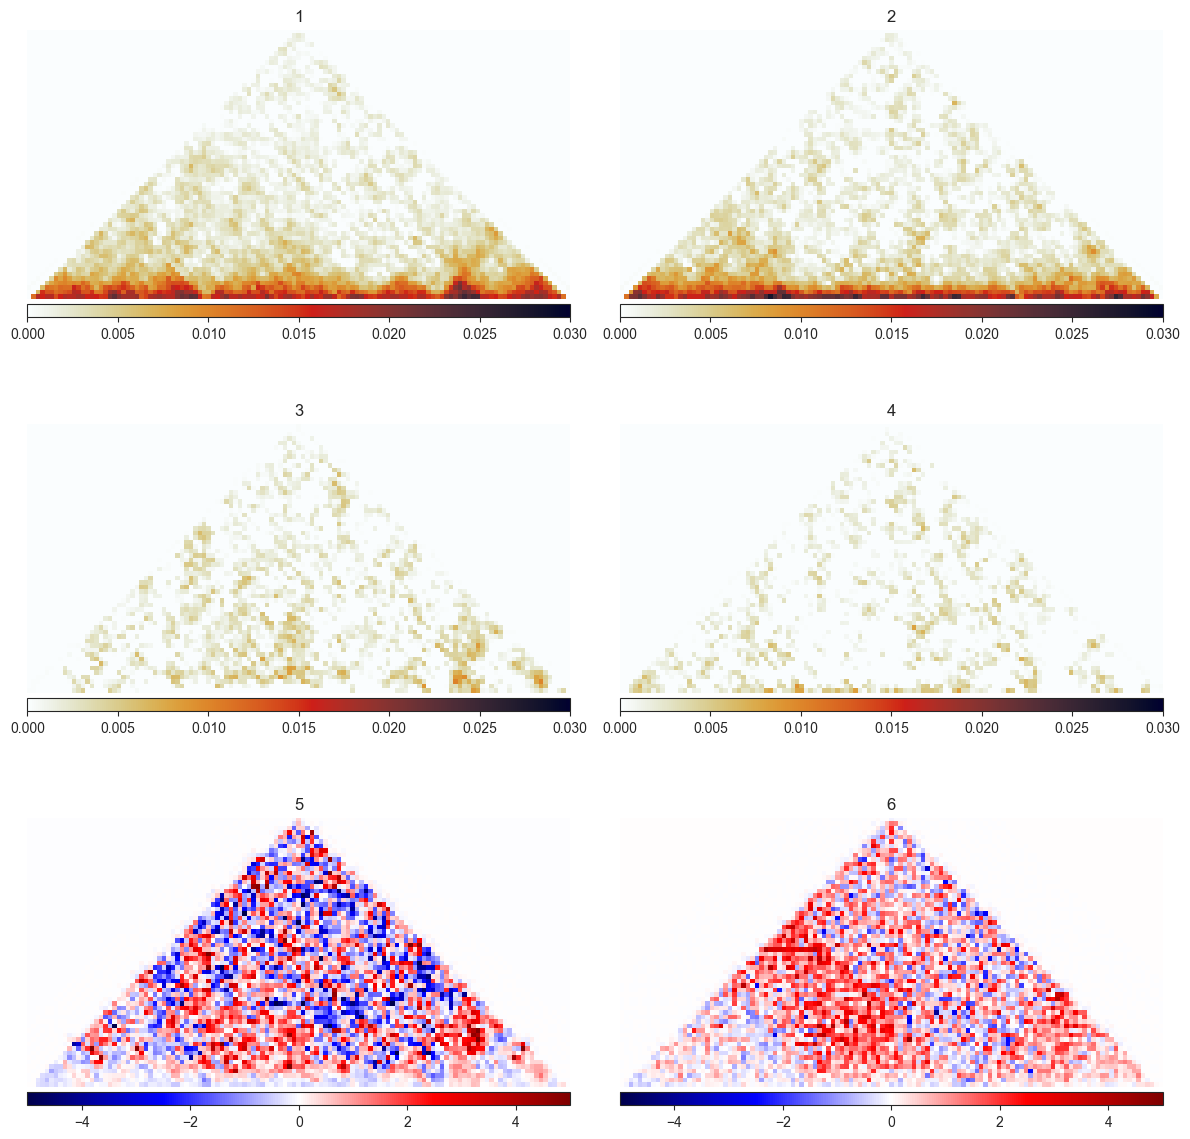

In [5]:
# Plot heatmaps in a grid layout
fig, axes = plt.subplots(3, 2, figsize=(12, 12))

middle = int(np.shape(rot_control)[1]/ 2.)

# Second row: PCA transformed matrices
m1 = axes[0][0].imshow(rot_auto1[:middle, :], vmin=0, vmax=0.03, cmap='germany')
axes[0, 0].set_title("1")

m2 = axes[0][1].imshow(rot_auto2[:middle, :], vmin=0, vmax=0.03, cmap='germany')
axes[0, 1].set_title("2")

# Third row: Difference matrix spanning two columns
m3 = axes[1][0].imshow(rot_diff_auto1[:middle, :], vmin=0, vmax=0.03, cmap='germany')
axes[1, 0].set_title("3")

m4 = axes[1][1].imshow(rot_diff_auto2[:middle, :], vmin=0, vmax=0.03, cmap='germany')
axes[1, 1].set_title("4")

# Fourth Row:
# apply log2(obs/exp) from pca modified matrices and raw matrices
m5 = axes[2][0].imshow(rot_log_auto1[:middle, :], vmin=-5, vmax=5, cmap='seismic')
axes[2, 0].set_title("5")

m6 = axes[2][1].imshow(rot_log_auto2[:middle, :], vmin=-5, vmax=5, cmap='seismic')
axes[2, 1].set_title("6")

color_bars = [m1, m2, m3, m4, m5, m6]

for i in range(0, len(axes)):
    for m, ax in zip([color_bars[i*2+1], color_bars[i*2+1]], axes[i]):
        ax.axis('off')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('bottom', size='5%', pad=0.05)
        fig.colorbar(m, cax=cax, orientation='horizontal') 

# Adjust layout
plt.tight_layout()

# save plot
save_path = os.path.join("out", "all_autoencoder_hic.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')  # High resolution and tight layout

print(f"Plot saved to {save_path}")
# TODO mse value calc
# mse_value = mean_squared_error(pca_matrix1, patient_region_sub)
# print(f"mse value {mse_value}")

## concentrated plots
include neccessary plots in one figure

Plot saved to out/autoencoder_hic.png


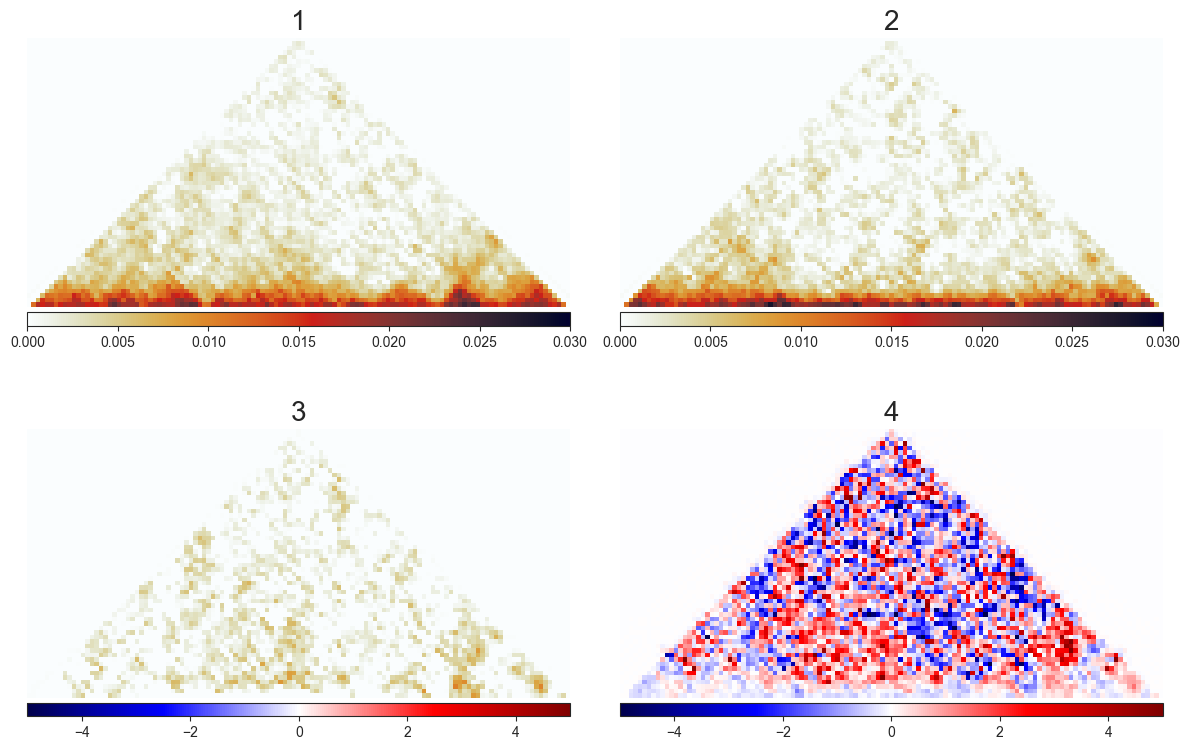

In [6]:
# Plot heatmaps in a grid layout
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

middle = int(np.shape(rot_control)[1]/ 2.)

# First row: autoencoder transformed matrices
m1 = axes[0][0].imshow(rot_auto1[:middle, :], vmin=0, vmax=0.03, cmap='germany')
axes[0, 0].set_title("1", fontsize=20)

m2 = axes[0][1].imshow(rot_auto2[:middle, :], vmin=0, vmax=0.03, cmap='germany')
axes[0, 1].set_title("2", fontsize=20)

# Second row: Difference matrix spanning two columns
m3 = axes[1][0].imshow(rot_diff_auto1[:middle, :], vmin=0, vmax=0.03, cmap='germany')
axes[1, 0].set_title("3", fontsize=20)

m4 = axes[1][1].imshow(rot_log_auto1[:middle, :], vmin=-5, vmax=5, cmap='seismic')
axes[1, 1].set_title("4", fontsize=20)

color_bars = [m1, m2, m3, m4]

for i in range(0, len(axes)):
    for m, ax in zip([color_bars[i*2+1], color_bars[i*2+1]], axes[i]):
        ax.axis('off')
        divider = make_axes_locatable(ax)
        cax = divider.append_axes('bottom', size='5%', pad=0.05)
        fig.colorbar(m, cax=cax, orientation='horizontal') 

# Adjust layout
plt.tight_layout()

# save plot
save_path = os.path.join("out", "autoencoder_hic.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')  # High resolution and tight layout

print(f"Plot saved to {save_path}")

## compute stats

In [7]:
print("stats for patient")

# Example usage
matrix_1 = patient_region_sub
matrix_2 = auto_patient

print("RMSE:", root_mean_squared_error(matrix_1, matrix_2)) # More interpretable than MSE since it has the same units as the matrix values.
print("SSIM:", structural_similarity(matrix_1, matrix_2)) # Values closer to 1 indicate better denoising. Useful for image-like matrix data.
print("Explained Variance:", explained_variance_score(matrix_1, matrix_2)) 

print("----------")
print("stats for control")

matrix_1 = control_region_sub
matrix_2 = auto_control

print("RMSE:", root_mean_squared_error(matrix_1, matrix_2)) # More interpretable than MSE since it has the same units as the matrix values.
print("SSIM:", structural_similarity(matrix_1, matrix_2)) # Values closer to 1 indicate better denoising. Useful for image-like matrix data.
print("Explained Variance:", explained_variance_score(matrix_1, matrix_2)) 

stats for patient
RMSE: 0.003265621480835418
SSIM: 0.5615199194179181
Explained Variance: 0.7058863349478853
----------
stats for control
RMSE: 0.004009939885666964
SSIM: 0.42939143692473153
Explained Variance: 0.6581601145725218
